# Import of Database

In [1]:
from Workbook_Init import *
warnings.simplefilter("ignore")
# Imports sqlite3, pandas, numpy, matplotlib, seaborn, statsmodels.api, scipy.stats.chisquare

In [2]:
# Connect to our SQLite database
conn = sqlite3.connect('traffic.db')
c = conn.cursor()

In [3]:
# Pull in the whole table as a dataframe
# Be patient, takes about 40 seconds

sql_all = "SELECT * FROM traffic"
all_df = pd.read_sql_query(sql_all, conn)
all_df.head()

,SeqID,Date Of Stop,Time Of Stop,Agency,SubAgency,Description,Location,Latitude,Longitude,Accident,Belts,Personal Injury,Property Damage,Fatal,Commercial License,HAZMAT,Commercial Vehicle,Alcohol,Work Zone,State,VehicleType,Year,Make,Model,Color,Violation Type,Charge,Article,Contributed To Accident,Race,Gender,Driver City,Driver State,DL State,Arrest Type,Geolocation,Council Districts,Councils,Communities,Zip Codes,Municipalities
0,865defcf-8348-4e11-a5bf-996d8b3ead3c,06/03/2019,22:49:00,MCP,"2nd District, Bethesda",DRIVER CHANGING LANES WHEN UNSAFE,ROCKVILLE PIKE @ GROSVENOR LN,39.0231383333333,-77.102615,No,No,No,No,No,No,No,No,No,No,DC,02 - Automobile,2016,BMW,X3,SILVER,Warning,21-309(b),Transportation Article,false,BLACK,M,WASHINGTON,DC,DC,A - Marked Patrol,"(39.0231383333333, -77.102615)",1,1,12,111,1
1,20bff600-1843-46c4-9596-6b0670eb8d74,06/03/2019,22:48:00,MCP,"2nd District, Bethesda",EXCEEDING THE POSTED SPEED LIMIT OF 35 MPH,RIVER/ROYAL DOMINION,38.99006,-77.15189,No,No,No,No,No,No,No,No,No,No,MD,02 - Automobile,2015,MERCEDEZBENZ,4S,BLACK,Warning,21-801.1,Transportation Article,false,WHITE,F,POTOMAC,MD,MD,A - Marked Patrol,"(38.99006, -77.15189)",1,1,12,103,1
2,e121eebe-daa1-4cca-afd4-8abb4b388ed6,06/03/2019,22:45:00,MCP,"4th District, Wheaton",EXCEEDING THE POSTED SPEED LIMIT OF 35 MPH,GEORGIA @ EPPING,39.0662666666667,-77.0592166666667,No,No,No,No,No,No,No,No,No,No,MD,02 - Automobile,2015,HONDA,CIVIC,GRAY,Warning,21-801.1,Transportation Article,false,WHITE,M,SILVER SPRING,MD,MD,A - Marked Patrol,"(39.0662666666667, -77.0592166666667)",4,4,23,6,1
3,1e25ee9b-c019-41c2-9d74-41e05e6d1cee,06/03/2019,22:43:00,MCP,"4th District, Wheaton",STOP LIGHTS (*),GEORGIA AVE / ASPON HILL RD,39.0825783333333,-77.076885,No,No,No,No,No,No,No,No,No,No,MD,02 - Automobile,2014,KIA,4S,SILVER,ESERO,64*,,false,WHITE,M,ROCKVILLE,MD,MD,A - Marked Patrol,"(39.0825783333333, -77.076885)",4,4,59,6,1
4,2c5730ec-d5e6-4657-a5a0-fcecca1ab140,06/03/2019,22:41:00,MCP,"2nd District, Bethesda",FAILURE TO DISPLAY & REFLECT RED COLOR LIGHT ON REAR LAMPS AND REFLECTORS AS REQ.,ARLINGTON RD / BETHESDA AVE,38.97886,-77.0985183333333,No,No,No,No,No,No,No,No,No,No,MD,02 - Automobile,2008,ACUR,TL,GRAY,Warning,22-209(b),Transportation Article,false,WHITE,F,BETHESDA,MD,MD,A - Marked Patrol,"(38.97886, -77.0985183333333)",1,1,12,111,1


In [4]:
# Info on the data fields in the full table

all_df.describe()

,SeqID,Date Of Stop,Time Of Stop,Agency,SubAgency,Description,Location,Latitude,Longitude,Accident,Belts,Personal Injury,Property Damage,Fatal,Commercial License,HAZMAT,Commercial Vehicle,Alcohol,Work Zone,State,VehicleType,Year,Make,Model,Color,Violation Type,Charge,Article,Contributed To Accident,Race,Gender,Driver City,Driver State,DL State,Arrest Type,Geolocation,Council Districts,Councils,Communities,Zip Codes,Municipalities
count,1529036,1529036,1529036,1529036,1529036,1529036,1529036,1529036,1529036,1529036,1529036,1529036,1529036,1529036,1529036,1529036,1529036,1529036,1529036,1529036,1529036,1529036,1529036,1529036,1529036,1529036,1529036,1529036,1529036,1529036,1529036,1529036,1529036,1529036,1529036,1529036,1529036,1529036,1529036,1529036,1529036
unique,867384,2710,1440,1,9,13987,210296,298798,339125,6,2,2,2,2,2,2,2,2,2,71,33,343,3900,19172,28,4,1078,5,2,6,3,7940,69,71,19,749951,6,6,63,145,25
top,33c49de3-9e36-4f36-9326-b59a95e86fe8,03/17/2015,23:30:00,MCP,"4th District, Wheaton",DRIVER FAILURE TO OBEY PROPERLY PLACED TRAFFIC CONTROL DEVICE INSTRUCTIONS,WAYNE AVE @ DALE DR,0,0,No,No,No,No,No,No,No,No,No,No,MD,02 - Automobile,2007,TOYOTA,4S,BLACK,Warning,21-801.1,Transportation Article,false,WHITE,M,SILVER SPRING,MD,MD,A - Marked Patrol,"(0.0, 0.0)",4,4,36,17,1
freq,59,1281,2312,1529036,375716,125683,2172,110485,110485,1482066,1480468,1511578,1499864,1528696,1484350,1528904,1522414,1526712,1528734,1333868,1347005,91465,175550,169430,311612,760397,191251,1439175,1492603,541783,1024170,380216,1379705,1329309,1267088,110485,334292,334292,184196,131235,1161876


In [5]:
# There appear to be many duplicates in the table.  There are multiple charges per SeqID.
np.mean(all_df.groupby('SeqID').size())

1.7628132407330548

## Create Unique Traffic Incidents Table and Aggregate Other Variables

In [6]:
# Create Table of Unique Traffic Incidents
# Toggle boolean to determine whether to reload

recreate_table = False

if recreate_table:
    sql_drop_table = """DROP TABLE IF EXISTS traffic_unique"""
    sql_create_unique_table = """
    CREATE TABLE traffic_unique AS
    SELECT SeqID, count(*) as Count, min(Race) as Race, min(Gender) as Gender, min(Color) as Color, min(Accident) as Accident, group_concat([Violation Type]) as 'Violation Type', group_concat([Description]) as Description FROM traffic
    GROUP BY SeqID;
    """

    c.execute(sql_drop_table)
    c.execute(sql_create_unique_table)

In [7]:
# Inspect the newly created table

sql_unique = """
                SELECT * from traffic_unique
                """

unique_df = pd.read_sql_query(sql_unique, conn)
unique_df.head()

,SeqID,Count,Race,Gender,Color,Accident,Violation Type,Description
0,00001e27-8bde-4328-8b33-2d2d9a9ce862,1,HISPANIC,F,N/A,No,Citation,PEDESTRIAN CROSSING ROADWAY BETWEEN ADJACENT INTERSECTIONS HAVING TRAFFIC CONTROL SIGNAL
1,00006268-72eb-42ff-b6b0-50c21d820e9c,1,BLACK,M,BLUE,No,Warning,FAILURE TO DISPLAY TWO LIGHTED FRONT LAMPS WHEN REQUIRED
2,000071c5-c385-4191-9cd7-e854d2054963,1,BLACK,F,BLACK,No,Warning,DRIVER FAILURE TO OBEY PROPERLY PLACED TRAFFIC CONTROL DEVICE INSTRUCTIONS
3,000099b1-4dcb-4f94-8aef-71ffb198890b,2,WHITE,M,BLACK,No,"Warning,Citation","DRIVING VEHICLE IN EXCESS OF REASONABLE AND PRUDENT SPEED ON HIGHWAY SPEED,FAILURE TO CONTROL VE..."
4,0000b339-ca9d-4a52-90a6-90ebd3110cd2,1,HISPANIC,M,BLACK,No,Warning,"FAILURE OF VEH. ON HWY. TO DISPLAY LIGHTED LAMPS, ILLUMINATING DEVICE IN UNFAVORABLE VISIBILITY ..."


In [8]:
violtype_df = unique_df.copy()
violtype_df['Warning'] = violtype_df['Violation Type'].str.contains('Warning')
violtype_df['Citation'] = violtype_df['Violation Type'].str.contains('Citation')
violtype_df['Warning_Only'] = violtype_df.Warning  & (violtype_df.Citation==False)
violtype_df.head()

,SeqID,Count,Race,Gender,Color,Accident,Violation Type,Description,Warning,Citation,Warning_Only
0,00001e27-8bde-4328-8b33-2d2d9a9ce862,1,HISPANIC,F,N/A,No,Citation,PEDESTRIAN CROSSING ROADWAY BETWEEN ADJACENT INTERSECTIONS HAVING TRAFFIC CONTROL SIGNAL,False,True,False
1,00006268-72eb-42ff-b6b0-50c21d820e9c,1,BLACK,M,BLUE,No,Warning,FAILURE TO DISPLAY TWO LIGHTED FRONT LAMPS WHEN REQUIRED,True,False,True
2,000071c5-c385-4191-9cd7-e854d2054963,1,BLACK,F,BLACK,No,Warning,DRIVER FAILURE TO OBEY PROPERLY PLACED TRAFFIC CONTROL DEVICE INSTRUCTIONS,True,False,True
3,000099b1-4dcb-4f94-8aef-71ffb198890b,2,WHITE,M,BLACK,No,"Warning,Citation","DRIVING VEHICLE IN EXCESS OF REASONABLE AND PRUDENT SPEED ON HIGHWAY SPEED,FAILURE TO CONTROL VE...",True,True,False
4,0000b339-ca9d-4a52-90a6-90ebd3110cd2,1,HISPANIC,M,BLACK,No,Warning,"FAILURE OF VEH. ON HWY. TO DISPLAY LIGHTED LAMPS, ILLUMINATING DEVICE IN UNFAVORABLE VISIBILITY ...",True,False,True


In [9]:
pd.crosstab(violtype_df['Race'], violtype_df['Warning_Only']).apply(lambda r: r/r.sum(), axis=1)

Warning_Only,False,True
Race,,
ASIAN,0.434478,0.565522
BLACK,0.445983,0.554017
HISPANIC,0.494629,0.505371
NATIVE AMERICAN,0.428122,0.571878
OTHER,0.429363,0.570637
WHITE,0.442501,0.557499


In [10]:
pd.crosstab(violtype_df['Race'], violtype_df['Citation']).apply(lambda r: r/r.sum(), axis=1)

Citation,False,True
Race,,
ASIAN,0.610069,0.389931
BLACK,0.595512,0.404488
HISPANIC,0.554967,0.445033
NATIVE AMERICAN,0.634313,0.365687
OTHER,0.605486,0.394514
WHITE,0.590060,0.409940


# Hypothesis Testing

## Null Hypothesis 1: 
H0: For drivers pulled over where the Description of offense is "FAILURE TO DISPLAY REGISTRATION CARD UPON DEMAND BY POLICE OFFICER", there is no difference in the proportion of hispanic and black drivers who are given only a warning.


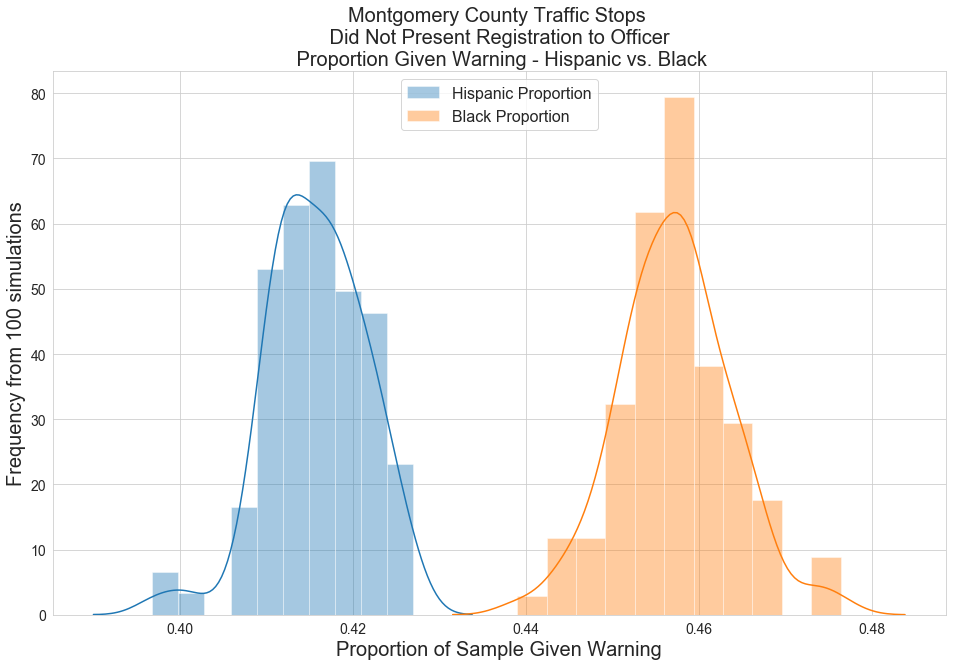

In [11]:
# 2 prop z-test on white versus black warnings

from statsmodels.stats.proportion import proportions_ztest


n_sim = 100

mu_hispanic_list = []
mu_black_list = []
h1_z_list = []
h1_p_list = []

for i in range(n_sim):
    n_sample = 5000

    
    descrip = "FAILURE TO DISPLAY REGISTRATION CARD UPON DEMAND BY POLICE OFFICER"
    
    df_hispanic_1 = sample_from_traffic_3(n_sample, conn, filters={'race':'HISPANIC', 'Description':descrip}, show_SQL=False)
    df_black_1 = sample_from_traffic_3(n_sample, conn, filters={'race':'BLACK', 'Description':descrip}, show_SQL=False)

    hispanic_cited = sum((df_hispanic_1['Violation Type'].str.contains('Warning')) & (df_hispanic_1['Violation Type'].str.contains('Citation')==False))
    black_cited = sum((df_black_1['Violation Type'].str.contains('Warning')) & (df_black_1['Violation Type'].str.contains('Citation')==False))

    mu_hispanic_list.append(hispanic_cited / n_sample)
    mu_black_list.append(black_cited / n_sample)
    
    count = np.array([hispanic_cited, black_cited])
    nobs = np.array([n_sample, n_sample])
    z,p = proportions_ztest(count, nobs, value=0, alternative='two-sided')
    h1_z_list.append(z)
    h1_p_list.append(p)
    


fig = plt.figure(figsize=(16,10))


sns.distplot(mu_hispanic_list, label="Hispanic Proportion", norm_hist=True)
sns.distplot(mu_black_list, label="Black Proportion", norm_hist=True)
plt.title('Montgomery County Traffic Stops \n Did Not Present Registration to Officer \n Proportion Given Warning - Hispanic vs. Black', fontsize=20)



plt.xlabel('Proportion of Sample Given Warning', fontsize=20)
plt.ylabel('Frequency from {} simulations'.format(n_sim), fontsize=20)


plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.legend(fontsize=16, loc=9);


In [12]:
null_hyp_1 = """For drivers pulled over where the Description of offense is "FAILURE TO DISPLAY REGISTRATION CARD UPON DEMAND BY POLICE OFFICER", there is no difference in the proportion of hispanic and black drivers who are given only a warning."""
h1_results = sampleprops_to_ttest(mu_black_list, mu_hispanic_list)

print_test_results(h1_results[1], null_hyp_1)

H0: For drivers pulled over where the Description of offense is "FAILURE TO DISPLAY REGISTRATION CARD UPON DEMAND BY POLICE OFFICER", there is no difference in the proportion of hispanic and black drivers who are given only a warning.

Results: p-value = 1.4032438920287199e-08

Null hypothesis rejected at alpha = 0.05 level.


## Null Hypothesis 2: 
H0: For drivers pulled over, there is no difference in the proportion of white and black drivers who are given a citation.

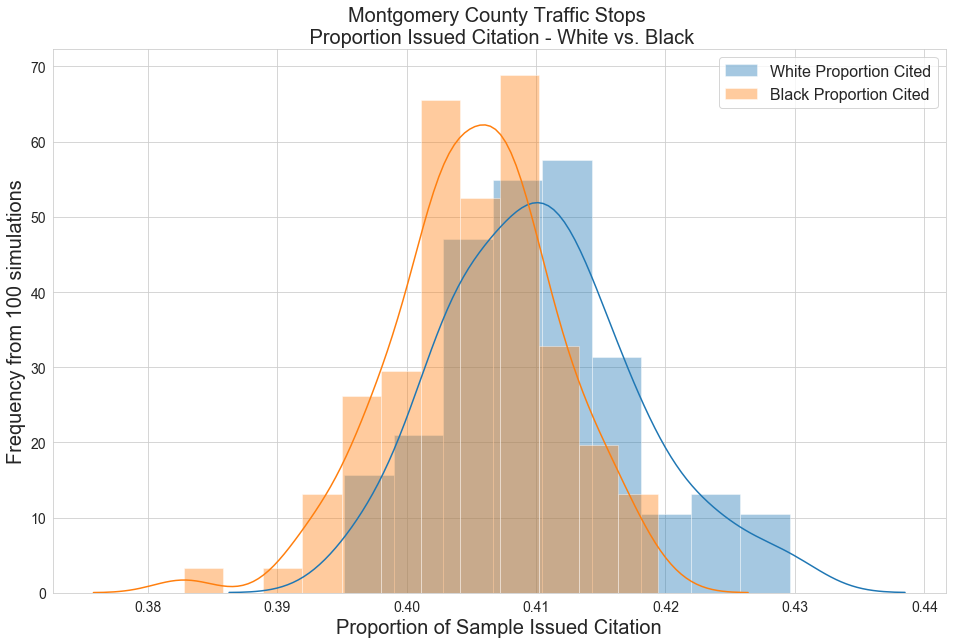

In [13]:
# 2 prop z-test on white versus black citations

from statsmodels.stats.proportion import proportions_ztest


n_sim = 100

mu_white_list = []
mu_black_list = []
h2_z_list = []
h2_p_list = []

for i in range(n_sim):
    n_sample = 5000

    df_white = sample_from_traffic_3(n_sample, conn, filters={'Race':'WHITE'}, show_SQL=False)
    df_black = sample_from_traffic_3(n_sample, conn, filters={'Race':'BLACK'}, show_SQL=False)

    white_cited = sum(df_white['Violation Type'].str.contains('Citation'))
    black_cited = sum(df_black['Violation Type'].str.contains('Citation'))

    mu_white_list.append(white_cited / n_sample)
    mu_black_list.append(black_cited / n_sample)
    
    count = np.array([white_cited, black_cited])
    nobs = np.array([n_sample, n_sample])
    z,p = proportions_ztest(count, nobs, value=0, alternative='two-sided')
    h2_z_list.append(z)
    h2_p_list.append(p)
    


fig = plt.figure(figsize=(16,10))


sns.distplot(mu_white_list, label="White Proportion Cited", norm_hist=True)
sns.distplot(mu_black_list, label="Black Proportion Cited", norm_hist=True)
plt.title('Montgomery County Traffic Stops \n Proportion Issued Citation - White vs. Black', fontsize=20)

plt.xlabel('Proportion of Sample Issued Citation', fontsize=20)
plt.ylabel('Frequency from {} simulations'.format(n_sim), fontsize=20)

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.legend(fontsize=16);


In [14]:
null_hyp_2 = """For drivers pulled over, there is no difference in the proportion of white and black drivers who are given a citation."""
h2_results = sampleprops_to_ttest(mu_black_list, mu_white_list)

print_test_results(h2_results[1], null_hyp_1)


H0: For drivers pulled over where the Description of offense is "FAILURE TO DISPLAY REGISTRATION CARD UPON DEMAND BY POLICE OFFICER", there is no difference in the proportion of hispanic and black drivers who are given only a warning.

Results: p-value = 0.4567678624218101

Fail to reject null hypothesis at alpha = 0.05 level.


## Null Hypothesis 3: 
For drivers pulled over, there is no difference in the proportion of white and black drivers and male and female drivers who are given a citation.


In [15]:
# 2 prop z-test on white versus black warnings
# we are running a z-test instead of a t-test because we're looking at the proportions of sample 
#given a warning rather than the number of people

from statsmodels.stats.proportion import proportions_ztest

#n_sim is repeating the whole sampling process of 5000 people for each category, 100 times
n_sim = 100


mu_black_male_list = []
mu_black_female_list = []
mu_white_male_list = []
mu_white_female_list = []

z3_list = []
p3_list = []

for i in range(n_sim):
    n_sample = 5000

    df_black_male = sample_from_traffic_3(n_sample, conn, filters={'race':'BLACK','gender':'M'}, show_SQL=False)
    df_black_female = sample_from_traffic_3(n_sample, conn, filters={'race':'BLACK', 'gender':'F'}, show_SQL=False)
    df_white_male = sample_from_traffic_3(n_sample, conn, filters={'race':'WHITE', 'gender':'M'}, show_SQL=False)
    df_white_female = sample_from_traffic_3(n_sample, conn, filters={'race':'WHITE', 'gender':'F'}, show_SQL=False)


    black_male_cited = sum(df_black_male['Violation Type'].str.contains('Citation'))
    black_female_cited = sum(df_black_female['Violation Type'].str.contains('Citation'))
    white_male_cited = sum(df_white_male['Violation Type'].str.contains('Citation'))
    white_female_cited = sum(df_white_female['Violation Type'].str.contains('Citation'))

    mu_black_male_list.append(black_male_cited / n_sample)
    mu_black_female_list.append(black_female_cited / n_sample)
    mu_white_male_list.append(white_male_cited / n_sample)
    mu_white_female_list.append(white_female_cited / n_sample)
    
    nobs = np.array([n_sample, n_sample])
    
    z1,p1 = proportions_ztest(np.array([black_male_cited, black_female_cited]), nobs, value=0, alternative='two-sided')
    z2,p2 = proportions_ztest(np.array([black_male_cited, white_male_cited]), nobs, value=0, alternative='two-sided')
    z3,p3 = proportions_ztest(np.array([white_female_cited, black_female_cited]), nobs, value=0, alternative='two-sided')
    z4,p4 = proportions_ztest(np.array([white_male_cited, white_female_cited]), nobs, value=0, alternative='two-sided')

    z3_list.append([z1, z2, z3, z4])
    p3_list.append([p1, p2, p3, p4])
    



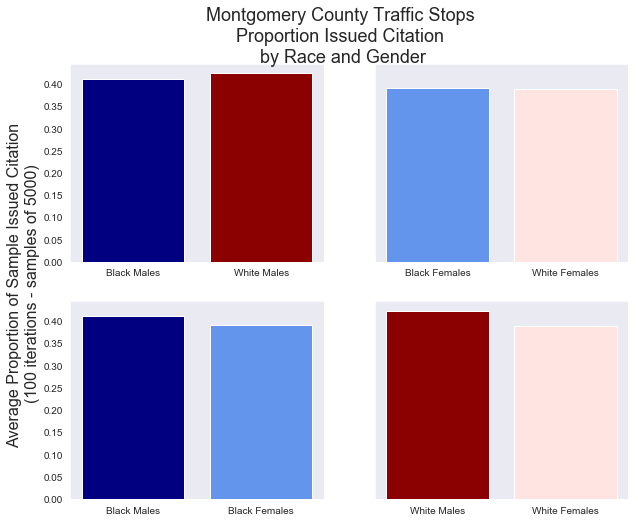

In [16]:
sns.set_style('dark')
fig, axes = plt.subplots(2, 2, sharey = True, figsize=(10, 8))


mu_black_male = np.mean(mu_black_male_list)
mu_white_male = np.mean(mu_white_male_list)
mu_white_female = np.mean(mu_white_female_list)
mu_black_female = np.mean(mu_black_female_list)

mean_list = [mu_black_male, mu_white_male, mu_black_female, mu_white_female]
names = ['Black Males', 'White Males', 'Black Females', 'White Females']
color_list = ['navy', 'darkred', 'cornflowerblue', 'mistyrose']

axes[0, 0].bar([names[0], names[1]], [mean_list[0], mean_list[1]], color=[color_list[0], color_list[1]])
axes[0, 1].bar([names[2], names[3]], [mean_list[2], mean_list[3]], color=[color_list[2], color_list[3]])
axes[1, 0].bar([names[0], names[2]], [mean_list[0], mean_list[2]], color=[color_list[0], color_list[2]])
axes[1, 1].bar([names[1], names[3]], [mean_list[1], mean_list[3]], color=[color_list[1], color_list[3]]);

fig.suptitle('Montgomery County Traffic Stops\n Proportion Issued Citation \n by Race and Gender\n', fontsize=18)

fig.text(0.06, 0.5, 'Average Proportion of Sample Issued Citation \n({} iterations - samples of {})'.format(n_sim, n_sample), ha='center', va='center', rotation='vertical', fontsize=16);

In [17]:
null_hyp_4a = """For drivers pulled over, there is no difference in the proportion of white male and black male drivers who are given a citation."""
null_hyp_4b = """For drivers pulled over, there is no difference in the proportion of white female and black female drivers who are given a citation."""

null_hyp_4c = """For drivers pulled over, there is no difference in the proportion of black male and black female drivers who are given a citation."""
null_hyp_4d = """For drivers pulled over, there is no difference in the proportion of white male and white female drivers who are given a citation."""

h4a_results = sampleprops_to_ttest(mu_white_male_list, mu_black_male_list)
h4b_results = sampleprops_to_ttest(mu_white_female_list, mu_black_female_list)
h4c_results = sampleprops_to_ttest(mu_black_male_list, mu_black_female_list)
h4d_results = sampleprops_to_ttest(mu_white_male_list, mu_white_female_list)



print_test_results(h4a_results[1], null_hyp_4a)
print('\n')
print_test_results(h4b_results[1], null_hyp_4b)
print('\n')
print_test_results(h4c_results[1], null_hyp_4c)
print('\n')
print_test_results(h4d_results[1], null_hyp_4d)


H0: For drivers pulled over, there is no difference in the proportion of white male and black male drivers who are given a citation.

Results: p-value = 0.09135818558335769

Fail to reject null hypothesis at alpha = 0.05 level.


H0: For drivers pulled over, there is no difference in the proportion of white female and black female drivers who are given a citation.

Results: p-value = 0.7930205014311515

Fail to reject null hypothesis at alpha = 0.05 level.


H0: For drivers pulled over, there is no difference in the proportion of black male and black female drivers who are given a citation.

Results: p-value = 0.0029297212584525533

Null hypothesis rejected at alpha = 0.05 level.


H0: For drivers pulled over, there is no difference in the proportion of white male and white female drivers who are given a citation.

Results: p-value = 1.424889387579306e-06

Null hypothesis rejected at alpha = 0.05 level.


## Null Hypothesis 4: 
The color of car and whether the car was involved in an accident are independent variables.

In [18]:
df = unique_df

contingency_table = pd.crosstab(
    df['Color'],
    df['Accident'],
    margins = False
)
contingency_table[['Yes', 'No']]

Accident,Yes,No
Color,,
,4,1238
BEIGE,133,9150
BLACK,1785,171669
BLUE,788,62600
"BLUE, DARK",239,17622
"BLUE, LIGHT",169,11435
BRONZE,25,2179
BROWN,48,4097
CAMOUFLAGE,0,19


In [19]:
f_obs = np.array([contingency_table['No'].values,
                  contingency_table['Yes'].values])

chi2_results = chi2_contingency(f_obs)[0:3]

In [20]:
alpha = 0.05
p_val = chi2_results[1]

print("H0: The color of car and whether the car was involved in an accident are independent variables.\n")
print("Results: p-value = {}\n".format(p_val))
if p_val < alpha:
    print("Null hypothesis rejected at alpha = {} level.\nCar color and whether in accident are not independent.".format(alpha))
else:
    print("Fail to reject null hypothesis at alpha = {} level.\nWe can not say that car color and whether in accident are not independent.".format(alpha))


H0: The color of car and whether the car was involved in an accident are independent variables.

Results: p-value = 1.5374775548906678e-75

Null hypothesis rejected at alpha = 0.05 level.
Car color and whether in accident are not independent.
